<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="10px"; height="100px">
        </CENTER>
        <h1 style="font-size:1vw">
        <CENTER><b>ANÁLISE EXPLORATÓRIA DOS DADOS</b></CENTER>
        <CENTER><b>ANÁLISE DE REGRESSÃO</b></CENTER>
  </body>
</html>

**NOME:** Dylan Faria Robson

**LINK PARA ESTE NOTEBOOK:** [Aqui!](https://colab.research.google.com/drive/10ZEMb9WxCOOWqaDMiI4saa5WCiIBd3Rd?usp=sharing)

# BIBLIOTECAS E FUNÇÕES

In [ ]:
# Bibliotecas basicas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Bibliotecas para o Modelo Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
# Bibliotecas para metricas estátisticas
import scipy
from sklearn import metrics
from sklearn import svm
from scipy.stats import bootstrap

In [ ]:
#Retirar "Warnings" do Pandas
import warnings
warnings.filterwarnings("ignore")

#Funções

In [ ]:
import pandas as pd
# Questão 1 - Discretização
def discretizar(dataset, column):
  '''
  DOCSTRING:
  dataset: nome do dataset
  column: 'example'
  Cria um dataframe com o nome t{numero da coluna}. Ex.: t1. Ele contem a relação entre as variaveis qualitarivas antes e depois da discretização.
  Para saber o numero da coluna a função: dataset.columns.get_loc('column')

  Return:
  dataframe com a relação 'Qualitativa' e 'Discretizada'.
  dataset com a coluna 'column' discretizada.

  '''
    #Função para fazer a discretização de variaveis qualitativas
  unique = dataset[column].unique()
  _qualitativa = []
  _discretizada = []

  for i in range(0, len(unique)):
      _qualitativa.append(unique[i])
      _discretizada.append(i)

  dataframe = pd.DataFrame(columns=["Qualitativa", "Discretizada"], data=list(zip(_qualitativa, _discretizada)))


  frequencias = dataset[column].value_counts()

  # Criar um dicionário de mapeamento de categoria para valor numérico

  mapeamento = {categoria: indice for indice, categoria in enumerate(frequencias.index)}

  # Aplicar o mapeamento para criar a nova coluna discreta

  dataset[column] = dataset[column].map(mapeamento)

  # Nome da coluna com a relação Pandas Series String e ndArray = t{numero da coluna no dataset}. Ex.: t1
  n_coluna = dataset.columns.get_loc(column)

  _str = f"t{n_coluna}"
  globals()[_str] = dataframe
  return globals()[_str]

_ = pd.read_csv('/content/Real_Estate_Sales_2001-2020_GL.csv', low_memory=False)
discretizar(_, 'Town')
discretizar(_, 'Property Type')
discretizar(_, 'Residential Type')
_.to_csv("/content/Dataset_tratado.csv",index=False)


In [ ]:
def Questao_1_e_3(dataset, X_, y_):
  '''
  DOCSTRING:
  dataset: nome do dataset
  X: ['example1', 'example2'] - Entradas descretizadas
  y = ['example'] - alvo
  Faz o processo de criação do dataset X e y para treino,  teste e validação , assim como
  o modelo treinado, testado e validado.

  Return:
  X e y utilizado no treino, teste e validação. Modelo treinado
  e de predição, residuos.
  '''


  # Separar: [X]
  X = dataset[X_]

  # Transformando Pandas Series em ndArray
  X = np.array(X)

  #Separa [y]
  y = dataset[y_]

  # Transformando Pandas Series em ndArray
  y = np.array(y)

  # Modelo Escolhido: Training 60%, Validation 20% e Test 20%
  X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
  regression = linear_model.LinearRegression()
  # Cross Validation
  for i in range(10):

    # Treinamento = 60% + (Validação + Teste) = 40%
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=.25, shuffle = True)

    regression.fit(X_train, y_train.ravel())

  # Predict
  y_estimator = regression.predict(X_validation)


  return y_estimator, X_train_validation, X_test, y_train_validation, y_test, y, X, X_train, X_validation, y_train, y_validation, regression

In [ ]:
# Questão 1 - Discretização
def discretizar(dataset, column):
  '''
  DOCSTRING:
  dataset: nome do dataset
  column: 'example'
  Cria um dataframe com o nome t{numero da coluna}. Ex.: t1. Ele contem a relação entre as variaveis qualitarivas antes e depois da discretização.
  Para saber o numero da coluna a função: dataset.columns.get_loc('column')

  Return:
  dataframe com a relação 'Qualitativa' e 'Discretizada'.
  dataset com a coluna 'column' discretizada.

  '''
    #Função para fazer a discretização de variaveis qualitativas
  unique = dataset[column].unique()
  _qualitativa = []
  _discretizada = []

  for i in range(0, len(unique)):
      _qualitativa.append(unique[i])
      _discretizada.append(i)

  dataframe = pd.DataFrame(columns=["Qualitativa", "Discretizada"], data=list(zip(_qualitativa, _discretizada)))


  frequencias = dataset[column].value_counts()

  # Criar um dicionário de mapeamento de categoria para valor numérico

  mapeamento = {categoria: indice for indice, categoria in enumerate(frequencias.index)}

  # Aplicar o mapeamento para criar a nova coluna discreta

  dataset[column] = dataset[column].map(mapeamento)

  # Nome da coluna com a relação Pandas Series String e ndArray = t{numero da coluna no dataset}. Ex.: t1
  n_coluna = dataset.columns.get_loc(column)

  _str = f"t{n_coluna}"
  globals()[_str] = dataframe
  return globals()[_str]


In [ ]:
# Para as Questões 1 e 3:
def plot_results(y_test, y_estimator):
  size = len(y_test)
  x = np.arange(1, size + 1, 1)
  fig, ax = plt.subplots()
  ax.scatter(x, y_test, 500, c="red", alpha=0.5, marker=r'1',
            label="REAL")
  ax.scatter(x, y_estimator, 500, c="black", alpha=0.5, marker=r'1', label="ESTIMADO")
  ax.set_xlabel("AMOSTRAS")
  ax.set_ylabel("TOTAL DE GASTOS (R$)")
  ax.legend()
  fig.set_figheight(10)
  fig.set_figwidth(8)
  plt.show()

def analyseResidual(resids):
  #plt.set_size_inches(17,10)
  plt.plot(resids)
  plt.xlabel('Amostras')
  plt.ylabel(f'Erro: $\\epsilon$ = {resids.mean(): .3f}')
  plt.title('Análise do resíduo: $\\epsilon = y_{real} - y_{estimado}$')
  plt.hlines(resids.mean(), 0, len(resids), color='red')
  plt.show()


In [ ]:
# Continuando celula anterior:
def residuals(clf, X, y, r_type='standardized'):
    """Calculate residuals or standardized residuals.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].
    r_type : str
        Type of residuals to return: 'raw', 'standardized', 'studentized'.
        Defaults to 'standardized'.

        * 'raw' will return the raw residuals.
        * 'standardized' will return the standardized residuals, also known as
          internally studentized residuals, which is calculated as the residuals
          divided by the square root of MSE (or the STD of the residuals).
        * 'studentized' will return the externally studentized residuals, which
          is calculated as the raw residuals divided by sqrt(LOO-MSE * (1 -
          leverage_score)).

    Returns
    -------
    numpy.ndarray
        An array of residuals.
    """
    # Make sure value of parameter 'r_type' is one we recognize
    assert r_type in ('raw', 'standardized', 'studentized'), (
        "Invalid option for 'r_type': {0}".format(r_type))
    y_true = y.view(dtype='float')
    # Use classifier to make predictions
    y_pred = clf.predict(X)
    # Make sure dimensions agree (Numpy still allows subtraction if they don't)
    assert y_true.shape == y_pred.shape, (
        "Dimensions of y_true {0} do not match y_pred {1}".format(y_true.shape,
                                                                  y_pred.shape))
    # Get raw residuals, or standardized or standardized residuals
    resids = y_pred - y_true
    if r_type == 'standardized':
        resids = resids / np.std(resids)
    elif r_type == 'studentized':
        # Prepare a blank array to hold studentized residuals
        studentized_resids = np.zeros(y_true.shape[0], dtype='float')
        # Calcluate hat matrix of X values so you can get leverage scores
        hat_matrix = np.dot(
            np.dot(X, np.linalg.inv(np.dot(np.transpose(X), X))),
            np.transpose(X))
        # For each point, calculate studentized residuals w/ leave-one-out MSE
        for i in range(y_true.shape[0]):
            # Make a mask so you can calculate leave-one-out MSE
            mask = np.ones(y_true.shape[0], dtype='bool')
            mask[i] = 0
            loo_mse = np.average(resids[mask] ** 2, axis=0)  # Leave-one-out MSE
            # Calculate studentized residuals
            studentized_resids[i] = resids[i] / np.sqrt(
                loo_mse * (1 - hat_matrix[i, i]))
        resids = studentized_resids
    return resids

def sse(clf, X, y):
    """Calculate the standard squared error of the model.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].

    Returns
    -------
    float
        The standard squared error of the model.
    """
    y_hat = clf.predict(X)
    sse = np.sum((y_hat - y) ** 2)
    return sse


def adj_r2_score(clf, X, y):
    """Calculate the adjusted :math:`R^2` of the model.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].

    Returns
    -------
    float
        The adjusted :math:`R^2` of the model.
    """
    n = X.shape[0]  # Number of observations
    p = X.shape[1]  # Number of features
    r_squared = metrics.r2_score(y, clf.predict(X))
    return 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))


def coef_se(clf, X, y):
    """Calculate standard error for beta coefficients.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].

    Returns
    -------
    numpy.ndarray
        An array of standard errors for the beta coefficients.
    """
    n = X.shape[0]
    X1 = np.hstack((np.ones((n, 1)), np.matrix(X)))
    se_matrix = scipy.linalg.sqrtm(
        metrics.mean_squared_error(y, clf.predict(X)) *
        np.linalg.inv(X1.T * X1)
    )
    return np.diagonal(se_matrix)


def coef_tval(clf, X, y):
    """Calculate t-statistic for beta coefficients.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].

    Returns
    -------
    numpy.ndarray
        An array of t-statistic values.
    """
    a = np.array(clf.intercept_ / coef_se(clf, X, y)[0])
    b = np.array(clf.coef_ / coef_se(clf, X, y)[1:])
    return np.append(a, b)


def coef_pval(clf, X, y):
    """Calculate p-values for beta coefficients.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].

    Returns
    -------
    numpy.ndarray
        An array of p-values.
    """
    n = X.shape[0]
    t = coef_tval(clf, X, y)
    p = 2 * (1 - scipy.stats.t.cdf(abs(t), n - 1))
    return p


def f_stat(clf, X, y):
    """Calculate summary F-statistic for beta coefficients.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].

    Returns
    -------
    float
        The F-statistic value.
    """
    n = X.shape[0]
    p = X.shape[1]
    r_squared = metrics.r2_score(y, clf.predict(X))
    return (r_squared / p) / ((1 - r_squared) / (n - p - 1))


def summary(clf, X, y, xlabels=None):
    """
    Output summary statistics for a fitted regression model.

    Parameters
    ----------
    clf : sklearn.linear_model
        A scikit-learn linear model classifier with a `predict()` method.
    X : numpy.ndarray
        Training data used to fit the classifier.
    y : numpy.ndarray
        Target training values, of shape = [n_samples].
    xlabels : list, tuple
        The labels for the predictors.
    """
    # Check and/or make xlabels
    ncols = X.shape[1]
    if xlabels is None:
        xlabels = np.array(
            ['x{0}'.format(i) for i in range(1, ncols + 1)], dtype='str')
    elif isinstance(xlabels, (tuple, list)):
        xlabels = np.array(xlabels, dtype='str')
    # Make sure dims of xlabels matches dims of X
    if xlabels.shape[0] != ncols:
        raise AssertionError(
            "Dimension of xlabels {0} does not match "
            "X {1}.".format(xlabels.shape, X.shape))
    # Create data frame of coefficient estimates and associated stats
    coef_df = pd.DataFrame(
        index=['_intercept'] + list(xlabels),
        columns=['Estimate', 'Std. Error', 't value', 'p value']
    )
    coef_df['Estimate'] = np.concatenate(
        (np.round(np.array([clf.intercept_]), 6), np.round((clf.coef_), 6)))
    coef_df['Std. Error'] = np.round(coef_se(clf, X, y), 6)
    coef_df['t value'] = np.round(coef_tval(clf, X, y), 4)
    coef_df['p value'] = np.round(coef_pval(clf, X, y), 6)
    # Create data frame to summarize residuals
    resids = residuals(clf, X, y, r_type='raw')
    resids_df = pd.DataFrame({
        'Min': pd.Series(np.round(resids.min(), 4)),
        '1Q': pd.Series(np.round(np.percentile(resids, q=25), 4)),
        'Median': pd.Series(np.round(np.median(resids), 4)),
        '3Q': pd.Series(np.round(np.percentile(resids, q=75), 4)),
        'Max': pd.Series(np.round(resids.max(), 4)),
    }, columns=['Min', '1Q', 'Median', '3Q', 'Max'])
    # Output results
    print("Residuals:")
    print(resids_df.to_string(index=False))
    print('\n')
    print('Coefficients:')
    print(coef_df.to_string(index=True))
    print('---')
    print('R-squared:  {0:.5f},    Adjusted R-squared:  {1:.5f}'.format(
        metrics.r2_score(y, clf.predict(X)), adj_r2_score(clf, X, y)))
    print('F-statistic: {0:.2f} on {1} features'.format(
        f_stat(clf, X, y), ncols))
    R_squared = metrics.r2_score(y, clf.predict(X))
    Adjusted_R_squared = adj_r2_score(clf, X, y)
    F_statistic = f_stat(clf, X, y)
    return resids_df, coef_df, R_squared, Adjusted_R_squared, F_statistic, resids

In [ ]:
def questao2(dataframe, column):
  '''
  DOCSTRING:
  dataframe = dataset
  column = 'example'
  Return:
    -> Limite Inferior = Q1 - 1.5 * IQR
    -> Limite Superior = Q3 + 1.5 * IQR
    -> Contagem: Quantidade de outliers
    -> Dataset: Dropando os outliers
  '''
  #Calculo Estátistico
  Q1 = dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)
  IQ = Q3 - Q1
  inferior = Q1-1.5*IQ
  superior = Q3+1.5*IQ

  #Indexação booleana + contagem
  outlier = dataframe[column][(dataframe[column]<(inferior)) | (dataframe[column]>(superior))]
  contagem = outlier.shape[0]

  #Indexação Booleana
  filtro = (dataframe[column]>(inferior)) & (dataframe[column]<(superior))

  #Retirada dos outliers
  global dataset
  dataset = dataframe[filtro]

  print(f"Limite Superior {superior: .2f}\n\nLimite Inferior {inferior: .2f}\n\nContegem  {contagem}")
  return dataset

In [ ]:
# Questão 4
def questao4(y_test, resids, hue):
  """
  DOCSTRING:
  y_test: ndArray utilizado para testar os valores de y.
  resids: residuos retornados da função summary
  hue: variavel que deve ser explicada através da utilização de legendas e cores

  Return:
  Grafico jointplot com relação y_test e resids
  """

  plt = sns.jointplot(x = y_test.ravel(), y = resids, hue=hue, kind='kde')
  #Colocando Titulo
  plt.fig.suptitle("JointPlot - Analise residual por sexo")
  plt.ax_joint.collections[0].set_alpha(0)
  plt.fig.tight_layout()
  plt.fig.subplots_adjust(top=0.95)
  #Colocando X e Y Labels
  plt.set_axis_labels('Amostras', 'Residuo', fontsize=16)

In [ ]:
def questao5():
  """
  DOCSTRING:
  Faz uma previsão utilizando o modelo o modelo de regressão linear 'regression'
  Utiliza as tabelas da relação 'Qualitativa' e 'Discretizada' criada na função 'discretizar'

  Return:
  Faz o print dos valores gerados de X e a previsão de y do modelo supracitado.
  """

  i = 0
  while True:

    option = int(input('1 - Prever, 0 - Parar\nSua Opção: '))
    if option == 0:
      print('\nEncerrando...\nPronto!')
      break
    if option == 1:
      i+=1
      # Amostra nova por Simulação: sample [x0,	x1,	x2,	x3]


      x0 = round(int(np.random.normal(X[:, 0].mean(), X[:, 0].std(), 1)[0]), 2)
      x1 = round(int(np.random.randint(0, 2, 1)[0]),2)
      #x2 = round(int(np.random.randint(0, 2, 1)[0]), 2)
      x3 = round(int(np.random.normal(X[:, 2].mean(), X[:, 2].std(), 1)[0]), 2)
      x4 = round(np.random.normal(X[:, 3].mean(), X[:, 3].std(), 1)[0], 2)

      if x0 <0:
        x0 = -x0
      # Amostra nova por Simulação: sample1
      sample = np.array([x0, x1, x3, x4])

      # Amostra nova: sample1 aplicar ao Modelo Linear
      y = regression.predict(sample.reshape(1, -1))
      y_estimado = y[0]
      #print(sample)




      # Voltando Discretização

      regiao = t0['Qualitativa'][x0]
      sexo = t1['Qualitativa'][x1]
      #estado_civil = t2['Qualitativa'][x2]
      dia = t2['Qualitativa'][x3]

      #Print
      print("\n---------------------------------")
      print(f"Cliente {i}")
      print(f"Região: {regiao}\nSexo: {sexo}\nDia: {dia}\nSalário Bruto: {x4: .2f}")
      print(f'VALOR ESTIMADO: R${y_estimado: .2f}\n')

    else:
      print('Opção não dispónivel')
      break

In [ ]:
#Extra
def Bootstrap_Distribution(data, metric = np.std):
  """
  DOCSTRING:
  data: dataset['column']
  Return:
  Faz o plot do grafico "Bootstrap".
  """
  rng = np.random.default_rng()
  data = (data,)  # samples must be in a sequence
  res = bootstrap(data, metric, confidence_level = 0.95,
                  random_state = rng)
  fig, ax = plt.subplots()
  ax.hist(res.bootstrap_distribution, bins=25)
  ax.set_title('Bootstrap Distribution')
  ax.set_xlabel('statistic value')
  ax.set_ylabel('frequency')
  plt.show()
  print('INTERVALO DE CONFIANÇA:')
  print(f'LOW : R$ {res.confidence_interval.low: .2f}')
  print(f'HIGH: R$ {res.confidence_interval.high: .2f}')
  print(f'SE. : R$ {res.standard_error: .2f}')

#LOAD

In [ ]:
# LOAD DO DATASET
dataset = pd.read_csv('/content/table3.csv', index_col = 0)

In [ ]:
dataset

,CÓDIGO,REGIÃO,SEXO,DIA,SALÁRIO BRUTO (R$),TOTAL DE GASTOS (R$)
0,3378,NORDESTE,FEMININO,SEXTA-FEIRA,4278.422505,17.142316
1,8657,NORDESTE,FEMININO,SÁBADO,5793.003135,657.742664
2,9891,CENTRO-OESTE,FEMININO,SÁBADO,3607.919786,5.398043
3,1743,SUDESTE,FEMININO,SÁBADO,4479.150188,54.459833
4,4212,NORDESTE,MASCULINO,SÁBADO,4100.578219,17.028375
...,...,...,...,...,...,...
4995,5694,CENTRO-OESTE,MASCULINO,SÁBADO,4580.181796,43.275137
4996,8074,SUDESTE,MASCULINO,SÁBADO,4099.572499,12.066558
4997,1193,SUDESTE,MASCULINO,SÁBADO,5350.885963,183.956860
4998,3338,SUDESTE,FEMININO,SÁBADO,4567.149396,41.542448


In [ ]:
#Deletando a Coluna com o codigo do cliente. É irrelevante para as analises aqui presentes
del dataset['CÓDIGO']

In [ ]:
dataset.columns

Index(['REGIÃO', 'SEXO', 'DIA', 'SALÁRIO BRUTO (R$)', 'TOTAL DE GASTOS (R$)'], dtype='object')

Para uma variável **quantitativa contínua: TOTAL DE GASTOS (R$)**, faça:

#Questão 1:

Faça o relatório de Análise de Regressão: antes de dropar os Outliers

In [ ]:
# Discretização
discretizar(dataset, 'REGIÃO')
discretizar(dataset, 'SEXO')
#discretizar(dataset, 'ESTADO CIVIL')
discretizar(dataset, 'DIA')

dataset.head(3)

,REGIÃO,SEXO,DIA,SALÁRIO BRUTO (R$),TOTAL DE GASTOS (R$)
0,1,0,1,4278.422505,17.142316
1,1,0,0,5793.003135,657.742664
2,2,0,0,3607.919786,5.398043


In [ ]:
#Treinamento de modelo
y_estimator, X_train_validation, X_test, y_train_validation, y_test, y, X, X_train, X_validation, y_train, y_validation, regression = Questao_1_e_3(dataset=dataset, X_=['REGIÃO', 'SEXO', 'DIA', 'SALÁRIO BRUTO (R$)'], y_=['TOTAL DE GASTOS (R$)'])

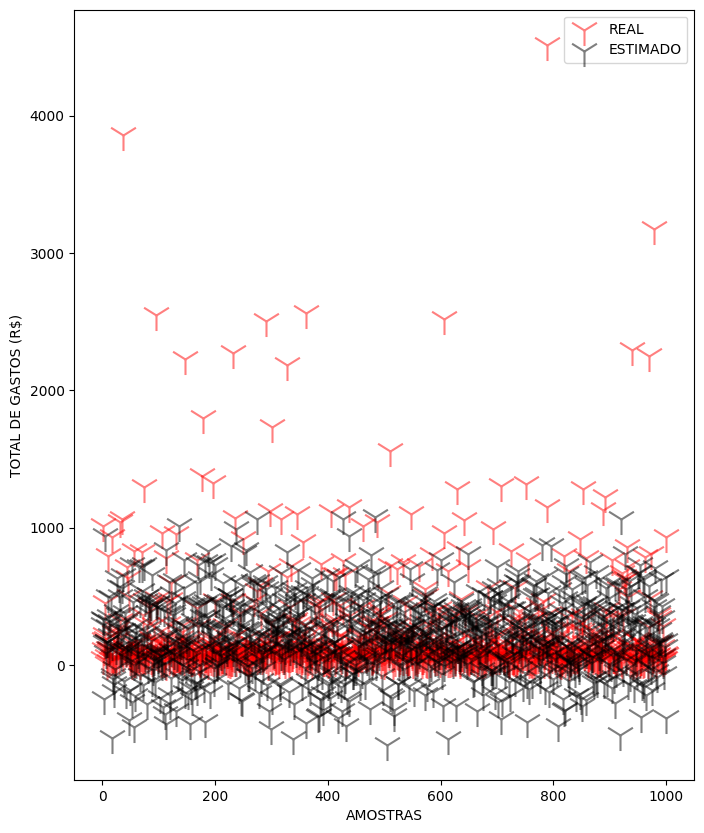

In [ ]:
#Relação y_validation e y_test
plot_results(y_test, y_estimator)

In [ ]:
# Resultados Estátisticos
resids_df, coef_df, R_squared, Adjusted_R_squared, F_statistic, resids = summary(regression, X_test, y_test.ravel(), xlabels=None)

Residuals:
       Min       1Q  Median       3Q      Max
-3501.2017 -66.9613 81.9801 175.5076 255.9044


Coefficients:
               Estimate  Std. Error   t value   p value
_intercept -2612.625626   91.143190  -28.6651  0.000000
x1             3.569517    7.064469    0.5053  0.613475
x2            18.491593   17.772362    1.0405  0.298374
x3             3.367409   13.465538    0.2501  0.802580
x4             0.561130    0.001766  317.7762  0.000000
---
R-squared:  0.45232,    Adjusted R-squared:  0.45012
F-statistic: 205.44 on 4 features


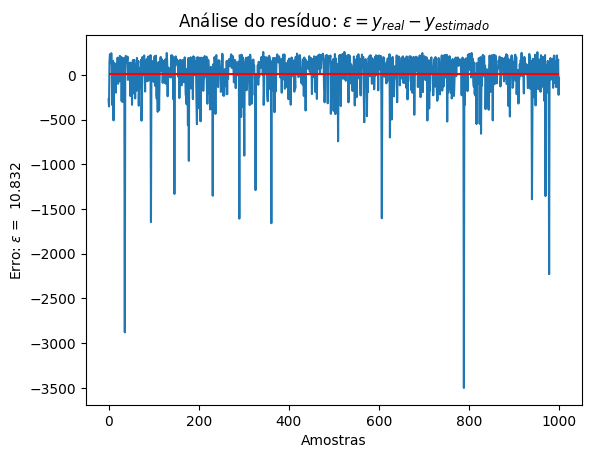

In [ ]:
#Analise do Residuo
analyseResidual(resids)

In [ ]:
#Verificando indice de correlação linear entre variaveis X e Y
dataset.corr(method='pearson')

,REGIÃO,SEXO,DIA,SALÁRIO BRUTO (R$),TOTAL DE GASTOS (R$)
REGIÃO,1.000000,0.009671,0.003425,-0.014060,-0.015084
SEXO,0.009671,1.000000,0.004755,0.024986,0.029517
DIA,0.003425,0.004755,1.000000,-0.012493,-0.007906
SALÁRIO BRUTO (R$),-0.014060,0.024986,-0.012493,1.000000,0.599841
TOTAL DE GASTOS (R$),-0.015084,0.029517,-0.007906,0.599841,1.000000


#Questão 2:

Faça o relatório de Análise de Outliers:

In [ ]:
#Analise e drop dos outliers

print("\n-------------- Help -------------------------\n")

help(questao2)

print("\n-------------- Total de Gastos -------------------------\n")

questao2(dataset, 'TOTAL DE GASTOS (R$)')


print("\n-------------- Salario Bruto -------------------------\n")

questao2(dataset, 'SALÁRIO BRUTO (R$)')

print("\n----------------- Resultado Final ----------------------\n")

display(dataset)


-------------- Help -------------------------

Help on function questao2 in module __main__:

questao2(dataframe, column)
    DOCSTRING:
    dataframe = dataset
    column = 'example'
    Return:
      -> Limite Inferior = Q1 - 1.5 * IQR
      -> Limite Superior = Q3 + 1.5 * IQR
      -> Contagem: Quantidade de outliers
      -> Dataset: Dropando os outliers


-------------- Total de Gastos -------------------------

Limite Superior  6148.14

Limite Inferior  3381.59

Contegem  32

-------------- Salario Bruto -------------------------

Limite Superior  6343.54

Limite Inferior  3646.33

Contegem  17

----------------- Resultado Final ----------------------



,REGIÃO,SEXO,DIA,SALÁRIO BRUTO (R$),TOTAL DE GASTOS (R$)
0,0,0,0,4851.696279,4326.191837
1,4,1,0,4920.834976,4281.409729
2,0,1,1,4712.654230,4445.506096
3,3,0,1,5002.711060,4478.304401
4,0,0,0,4631.743982,4654.132385
...,...,...,...,...,...
4995,1,1,1,4847.303620,4396.558077
4996,0,1,2,5584.728515,5516.419238
4997,0,1,0,5015.060319,4806.101271
4998,0,0,1,3983.929942,3992.340451


#Questão 3:

Faça o relatório de Análise de Regressão: **após dropar** os Outliers

In [ ]:
#Treinamento de modelo
y_estimator, X_train_validation, X_test, y_train_validation, y_test, y, X, X_train, X_validation, y_train, y_validation, regression = Questao_1_e_3(dataset=dataset, X_=['REGIÃO', 'SEXO', 'DIA', 'SALÁRIO BRUTO (R$)'], y_=['TOTAL DE GASTOS (R$)'])

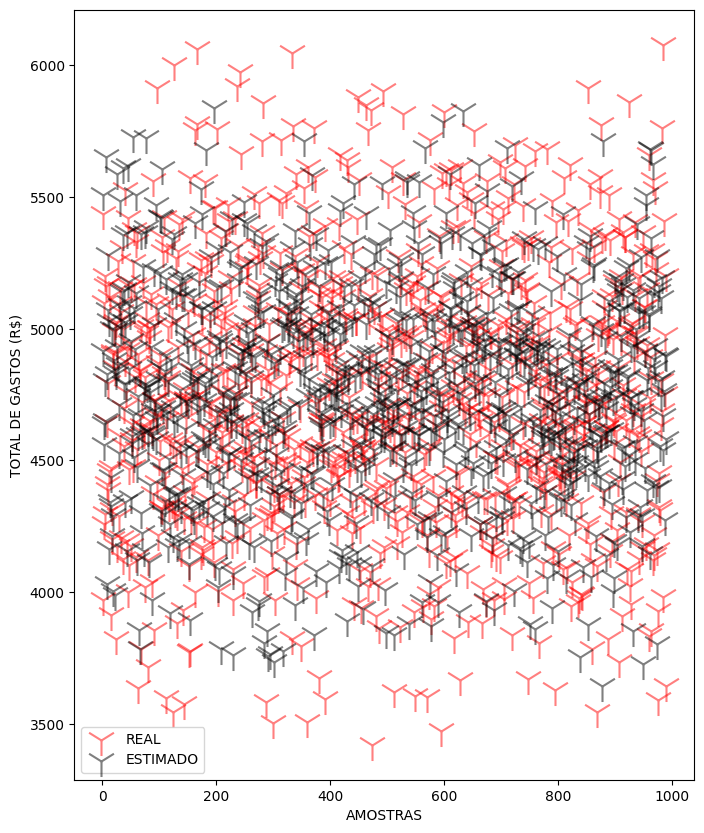

In [ ]:
#Relação y_validation e y_test
plot_results(y_test[:990], y_estimator)

In [ ]:
# Resultados Estátisticos
resids_df, coef_df, R_squared, Adjusted_R_squared, F_statistic, resids = summary(regression, X_test, y_test.ravel(), xlabels=None)

Residuals:
      Min       1Q  Median       3Q    Max
-479.8669 -222.246 22.8999 237.8097 489.61


Coefficients:
              Estimate  Std. Error   t value   p value
_intercept  604.193884   90.918793    6.6454  0.000000
x1           -6.203715    7.004057   -0.8857  0.375977
x2           10.359385   17.436726    0.5941  0.552572
x3           -4.594983   13.136550   -0.3498  0.726574
x4            0.834645    0.001737  480.4423  0.000000
---
R-squared:  0.69765,    Adjusted R-squared:  0.69642
F-statistic: 568.78 on 4 features


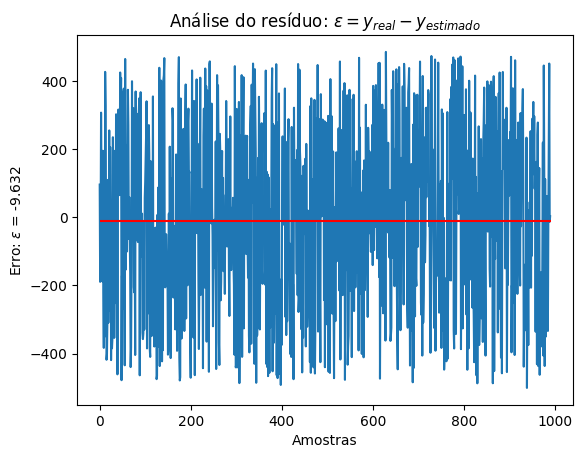

In [ ]:
#Analise do Residuo
analyseResidual(resids)

#Questão 4:

Faça o gráfico de Análise Residual (jointplot) por **hue** = sexo

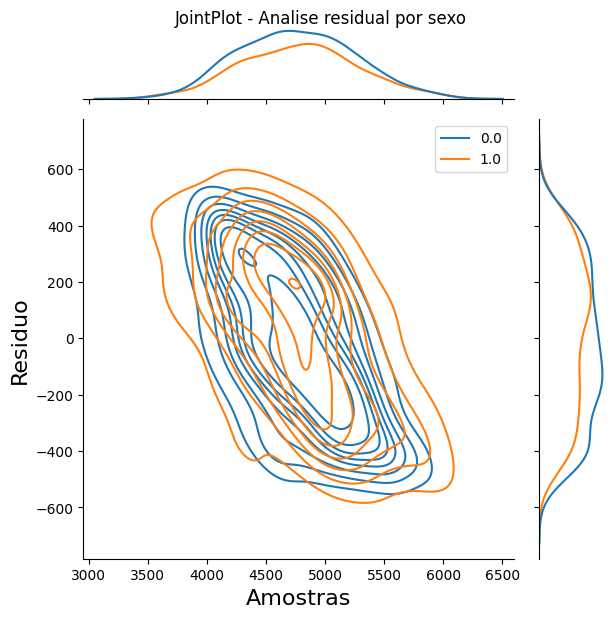

In [ ]:
#JoinPlot Hue = Sexo. 0 - Feminino, 1 -Masculina
questao4(y_test, resids, X_test[:, 1])

#Questão 5:

Faça a simulação dos dados exibindo TODAS as informações do cliente + Gasto estimado:

In [ ]:
questao5()

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 1
Região: NORTE
Sexo: FEMININO
Dia: SEXTA-FEIRA
Salário Bruto:  4718.89
VALOR ESTIMADO: R$ 4537.49

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 2
Região: SUDESTE
Sexo: MASCULINO
Dia: SÁBADO
Salário Bruto:  6023.09
VALOR ESTIMADO: R$ 5626.69

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 3
Região: SUDESTE
Sexo: MASCULINO
Dia: SÁBADO
Salário Bruto:  5402.09
VALOR ESTIMADO: R$ 5107.00

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 4
Região: SUDESTE
Sexo: FEMININO
Dia: SÁBADO
Salário Bruto:  4401.72
VALOR ESTIMADO: R$ 4278.73

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 5
Região: SUDESTE
Sexo: FEMININO
Dia: SÁBADO
Salário Bruto:  3993.77
VALOR ESTIMADO: R$ 3937.33

1 - Prever, 0 - Parar
Sua Opção: 1

---------------------------------
Cliente 6
Região: NORTE
Sexo: FEMININO
Dia: SÁBADO

#Extra

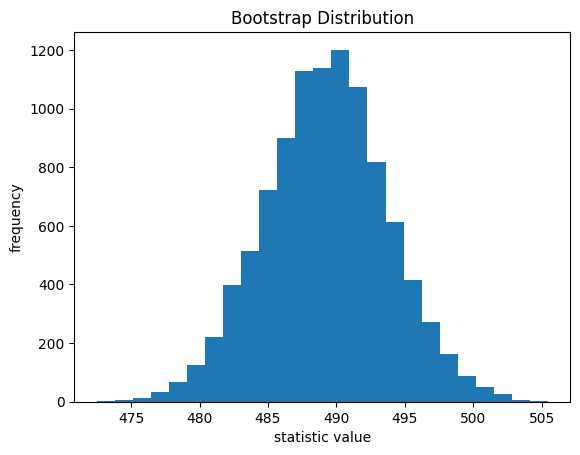

INTERVALO DE CONFIANÇA:
LOW : R$  480.62
HIGH: R$  498.25
SE. : R$  4.48


In [ ]:
Bootstrap_Distribution(data=dataset['TOTAL DE GASTOS (R$)'])

#CONCLUSÕES:


1. È possivel concluir que, com um R$^2$ de aproximadamente 70% e a correlação apresentada a partir do metodo de pearson,  as variaveis X do dataset tem correlação linear significativa com o target y.

2. No que diz respeito a precisão do modelo de regressão linear, com R$^2$ de 70%, o modelo é representativa da realidade dos dados, porém não cobre totalmente a realidade, pois há dados que não parecem seguir a tendencia de linearidade da maioria do dataset.

3. Após a retirada dos outliers do dataset e criação de um novo modelo, o R$^2$ não teve alteração significativa (ficando até menor do que o apresentado pelo modelo com outliers). Em outras palavras, na situação apresentada, os outliers não representavam pontos de desvios consideraveis para o modelo de regressão linear.

4. Considerando os dados supracitados, o modelo de previsão criado pode ser utilizado para previsões - assim como feito na questão 5, porém é necessario lembrar que sua precisão ainda não é alta o suficiente para tomar decissões com segurança, haja vista que a probabilidade o nivel de confiança não chega nos 90 a 99 como tipicamente utilizado. Fora isso, há um erro que pode variar de -400 a 400 como mostrado pela função 'analyseResidual'.

5. Por fim, a partir do grafico do bootstrap, é possivel concluir que o dataset apresenta uma distribuição normal. Isso quer dizer que as medidas de tendencia central - media, moda e mediana, estão bem proximas (ao centro).


PARA ENTREGAR: Coverter seu YPYNB para PDF:

In [ ]:
%%shell
jupyter nbconvert --to html /content/Análise_de_Regressão_I.ipynb

[NbConvertApp] Converting notebook /content/Análise_de_Regressão_I.ipynb to html
[NbConvertApp] Writing 2035891 bytes to /content/Análise_de_Regressão_I.html
